## Introducción

Para desarrollar un modelo de regresión en Python, es importante contar con los siguientes conocimientos previos:

- Conocimiento de matemáticas aplicadas a la inteligencia artificial, como álgebra lineal, cálculo y estadística.
- Experiencia en análisis exploratorio de datos, que incluye la capacidad de interpretar, visualizar y resumir datos para comprender patrones y relaciones.
- Familiaridad con técnicas de visualización de datos utilizando bibliotecas como Matplotlib y Seaborn para crear gráficos y visualizaciones efectivas.
- Entendimiento de los fundamentos de la inteligencia artificial, especialmente los conceptos básicos de aprendizaje supervisado.

A continuación, se presenta un cuadro sinóptico que detalla los pasos necesarios para crear y ajustar un modelo de aprendizaje supervisado, incluyendo la regresión lineal:

![Cuadro Sinóptico de Aprendizaje Supervisado](pasos_aprendizaje_supervisado.png)


In [200]:
# Especifica la ruta completa del archivo CSV
archivo_csv = r'C:\Users\lucia\Desktop\MASTER\Documentación minería de datos y modelización predictiva - Guillermo Villarino -20240209\Analisis_vivienda\df_depurado_viviendas.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(archivo_csv)

# Verificar que el DataFrame se haya cargado correctamente
print(df.head())

# Hacer una copias del DataFrame original
df3 = df.copy()


df2 = df.copy()

x = df.copy()

   year  month   price  Luxury  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014      7  653450       1         3        2.5         2070        -1   
1  2014      6  710000       1         2        1.5         1640        -1   
2  2014     10  780000       1         4        3.5         3720        -1   
3  2014     12  795000       1         3        3.5         2260        -1   
4  2014     10  399950       0         3        2.0         2050        -1   

   floors  waterfront  view condition  sqft_above  basement  yr_built  \
0     1.0           0     0         C        1540         1      1980   
1     1.5           0     0         A        1540         1      1916   
2     1.0           0     1         B        3360         0      2007   
3     2.0           0     0         B        1880         1      2003   
4     1.0           0     0         A        1170         1      1960   

   yr_renovated      lat     long  
0             0  47.5936 -122.013  
1             0  47.

#### Analisis Previo


- Análisis de datos para tu primera regresión lineal
  Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn con las siguientes variables objetivos:


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4960 non-null   int64  
 1   month         4960 non-null   int64  
 2   price         4960 non-null   int64  
 3   Luxury        4960 non-null   int64  
 4   bedrooms      4960 non-null   int64  
 5   bathrooms     4960 non-null   float64
 6   sqft_living   4960 non-null   int64  
 7   sqft_lot      4960 non-null   int64  
 8   floors        4960 non-null   float64
 9   waterfront    4960 non-null   int64  
 10  view          4960 non-null   int64  
 11  condition     4960 non-null   object 
 12  sqft_above    4960 non-null   int64  
 13  basement      4960 non-null   int64  
 14  yr_built      4960 non-null   int64  
 15  yr_renovated  4960 non-null   int64  
 16  lat           4960 non-null   float64
 17  long          4960 non-null   float64
dtypes: float64(4), int64(13), ob

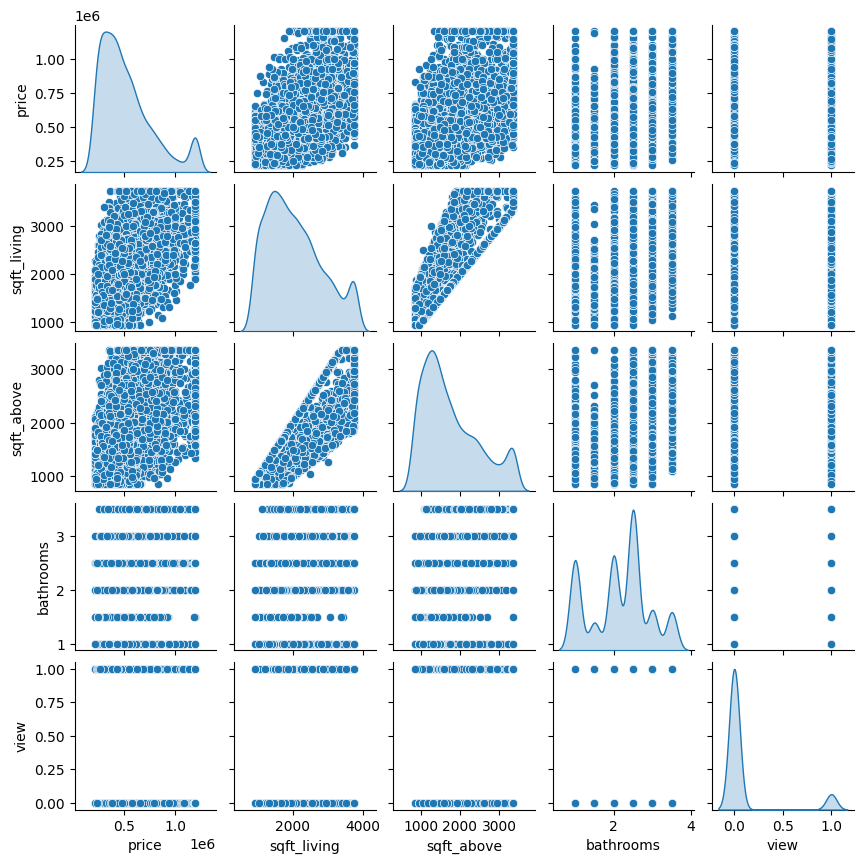

In [5]:

# Supongamos que tu DataFrame se llama df
# Seleccionamos los features que más nos interesan para ver la correlación entre las variables
cols = ["price", "sqft_living", "sqft_above", "bathrooms", "view"]

# Graficamos con un pairplot las variables de interés para ver sus relaciones
sns.pairplot(df[cols], height=1.75, diag_kind='kde')

# Mostrar el gráfico
plt.show()


### Correlaciones:

Coeficiente de Correlación de Pearson y el Análisis de Correlación son conceptos relacionados pero tienen diferencias sutiles en el contexto de la estadística y el análisis de datos.

#### Coeficiente de Correlación de Pearson

El Coeficiente de Correlación de Pearson es una medida estadística que calcula la fuerza y la dirección de la relación lineal entre dos variables continuas. Su valor oscila entre -1 y 1:

- **1**: Indica una correlación positiva perfecta.
- **0**: Indica que no hay correlación lineal.
- **-1**: Indica una correlación negativa perfecta.

#### Análisis de Correlación

El Análisis de Correlación es un enfoque más amplio que incluye la evaluación de la relación entre dos o más variables. Este análisis puede incluir diversas medidas de correlación, como:

1. **Coeficiente de Correlación de Pearson**: Para relaciones lineales entre variables continuas.
2. **Coeficiente de Correlación de Spearman**: Para relaciones monotónicas (no necesariamente lineales) y datos ordinales.
3. **Coeficiente de Correlación de Kendall**: Para evaluar asociaciones ordinales.
4. **Correlación de Cramér**: Para evaluar la asociación entre variables categóricas.

El análisis de correlación también puede incluir:

- **Matrices de Correlación**: Una tabla que muestra las correlaciones entre múltiples variables.
- **Mapas de Calor**: Visualización de una matriz de correlación para facilitar la identificación de patrones.
- **Análisis de Redundancia**: Evaluar la redundancia entre variables para reducir dimensionalidad.
- **Significancia Estadística**: Determinar si las correlaciones observadas son estadísticamente significativas.

#### Diferencias Clave

1. **Enfoque**:

   - **Coeficiente de Correlación de Pearson**: Específicamente mide la relación lineal entre dos variables continuas.
   - **Análisis de Correlación**: Evaluación más general que puede incluir múltiples tipos de correlación y múltiples variables.

2. **Alcance**:

   - **Coeficiente de Correlación de Pearson**: Solo una métrica específica.
   - **Análisis de Correlación**: Conjunto de técnicas y métodos para evaluar relaciones entre variables.

3. **Aplicación**:
   - **Coeficiente de Correlación de Pearson**: Utilizado cuando se sospecha que las variables tienen una relación lineal.
   - **Análisis de Correlación**: Utilizado en análisis exploratorios para identificar relaciones entre múltiples variables de diferentes tipos.


In [169]:

from scipy.stats import pearsonr

# Supongamos que df es tu DataFrame
cols = ["price", "sqft_living", "sqft_above", "bathrooms", "view"]
df = df[cols]

# Calcular el Coeficiente de Correlación de Pearson
corr_matrix = df.corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de Correlación de Pearson:")
print(corr_matrix)


# Calcular y mostrar los coeficientes de correlación individuales con respecto a 'price'
for col in cols[1:]:
    coef, p_value = pearsonr(df['price'], df[col])
    print(f"Coeficiente de Correlación de Pearson entre 'price' y '{col}': {coef}, p-value: {p_value}")


Matriz de Correlación de Pearson:
                price  sqft_living  sqft_above  bathrooms      view
price        1.000000     0.699288    0.592806   0.511363  0.379691
sqft_living  0.699288     1.000000    0.861482   0.703218  0.258641
sqft_above   0.592806     0.861482    1.000000   0.623496  0.138184
bathrooms    0.511363     0.703218    0.623496   1.000000  0.184820
view         0.379691     0.258641    0.138184   0.184820  1.000000
Coeficiente de Correlación de Pearson entre 'price' y 'sqft_living': 0.6992882549649637, p-value: 0.0
Coeficiente de Correlación de Pearson entre 'price' y 'sqft_above': 0.5928056128312831, p-value: 0.0
Coeficiente de Correlación de Pearson entre 'price' y 'bathrooms': 0.5113632544466287, p-value: 0.0
Coeficiente de Correlación de Pearson entre 'price' y 'view': 0.3796908045198929, p-value: 7.397743508553722e-170


Correlaciones con 'price':
                 price
year          0.016431
month        -0.017728
price         1.000000
Luxury        0.792815
bedrooms      0.362886
bathrooms     0.511363
sqft_living   0.699288
sqft_lot      0.154042
floors        0.317929
waterfront    0.097442
view          0.379691
sqft_above    0.592806
basement      0.209219
yr_built      0.055248
yr_renovated  0.110599
lat           0.382784
long          0.023665


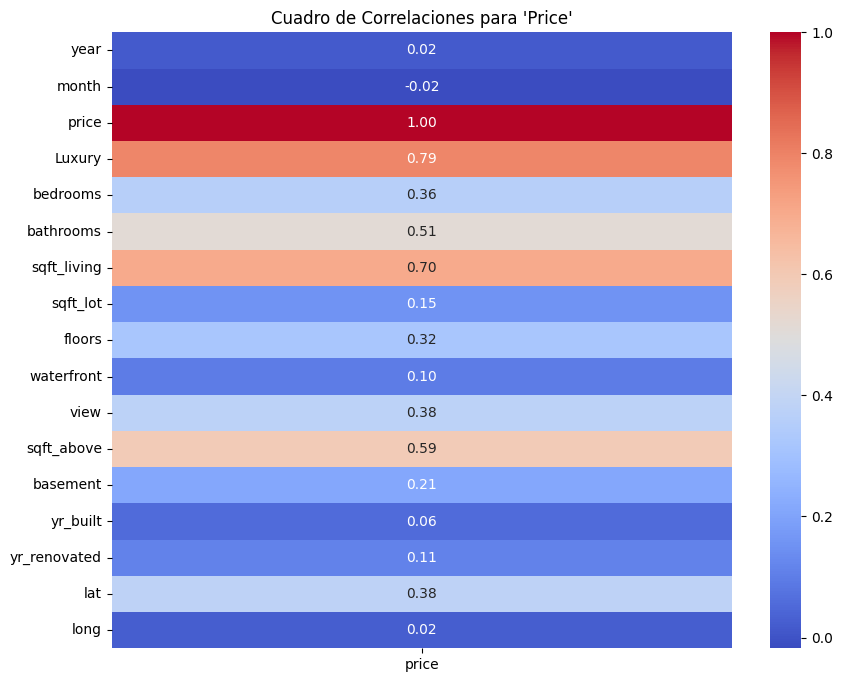

In [6]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Mostrar correlaciones relacionadas con 'price' y 'Luxury'
correlations_of_interest = correlation_matrix[['price']]

print("Correlaciones con 'price':")
print(correlations_of_interest)

# Crear el heatmap para visualizar correlaciones relacionadas con 'price' y 'Luxury'
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_of_interest, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cuadro de Correlaciones para 'Price'")
plt.show()


#### Interpretación de los Resultados

#### Correlaciones

Las correlaciones obtenidas con respecto a `price` son las siguientes:

- `sqft_living`: 0.699
- `sqft_above`: 0.593
- `bathrooms`: 0.511
- `view`: 0.380
- `Luxury`: 0.793

Estos coeficientes indican que hay una relación positiva moderada a fuerte entre `price` y `sqft_living`, `sqft_above`, `bathrooms`, `view`. Una correlación cercana a 1 sugiere una fuerte relación lineal positiva, mientras que una correlación cercana a 0 sugiere una relación débil.

### Decisión sobre el Tipo de Regresión

Dada la naturaleza de las correlaciones observadas:

- **Regresión Lineal**: Puede ser una buena opción inicial, ya que las relaciones con `price` parecen ser lineales y bastante fuertes para algunas variables como `sqft_living`

- **Regresión Polinómica**: Si los residuos de la regresión lineal no están distribuidos aleatoriamente, se podria considerar incluir términos polinómicos para capturar relaciones no lineales.

- **Modelos Regularizados (Ridge, Lasso)**: variables están correlacionadas entre sí (como `sqft_living` y `sqft_above`), se podría considerar la regresión regularizada para manejar la multicolinealidad y mejorar la generalización del modelo.

- **Modelos No Lineales (Random Forest, Gradient Boosting)**: Dado que algunos factores como `view` y `Luxury` pueden tener efectos no lineales o interacciones complejas, modelos más avanzados como Random Forest o Gradient Boosting podrían capturar mejor estas relaciones.


### Ahora si, al modelo


##### 1. Preparación de los Datos


![Descripción de la imagen](preparacion_datos.png)


In [101]:
# Definir las características y la variable objetivo
X = df[['bedrooms', 'bathrooms', 'basement', 'sqft_lot', 'view','floors']]
y = df['price']

In [102]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 2. Normalización de los Datos

Normalizamos las características numéricas para mejorar el rendimiento de los modelos.


In [103]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Este código utiliza _StandardScaler de sklearn.preprocessing_ para normalizar las características. Primero, se ajusta el escalador a los datos de entrenamiento (fit_transform), y luego se transforma tanto el conjunto de entrenamiento como el de prueba (transform).


##### 3. Entrenamiento y Evaluación de Modelos

Entrenamos y evaluamos los modelos de Regresión Lineal Múltiple, Ridge Regression y Lasso Regression.


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Regresión Lineal Múltiple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Regresión Lineal Múltiple - MSE: {mse_linear}, R2: {r2_linear}")


Regresión Lineal Múltiple - MSE: 42220126781.00343, R2: 0.3780364753416712


In [11]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")


Ridge Regression - MSE: 31250972995.93421, R2: 0.5396279737772132


In [12]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso Regression - MSE: 31250591442.66869, R2: 0.5396335946086025


##### 4. Selección del Mejor Modelo

Comparamos las métricas de rendimiento (MSE y R2) de los tres modelos para seleccionar el mejor.


In [13]:
print("Resultados de los Modelos:")
print(f"Regresión Lineal Múltiple - MSE: {mse_linear}, R2: {r2_linear}")
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")

# Selección del mejor modelo basado en el MSE y R2
model_performance = {
    'Linear Regression': {'MSE': mse_linear, 'R2': r2_linear},
    'Ridge Regression': {'MSE': mse_ridge, 'R2': r2_ridge},
    'Lasso Regression': {'MSE': mse_lasso, 'R2': r2_lasso}
}

best_model = min(model_performance, key=lambda x: model_performance[x]['MSE'])
print(f"El mejor modelo es: {best_model}")


Resultados de los Modelos:
Regresión Lineal Múltiple - MSE: 31250586683.527084, R2: 0.5396336647176407
Ridge Regression - MSE: 31250972995.93421, R2: 0.5396279737772132
Lasso Regression - MSE: 31250591442.66869, R2: 0.5396335946086025
El mejor modelo es: Linear Regression


### Interpretación de las Métricas de Evaluación del Modelo

El propósito de evaluar un modelo de regresión es **determinar qué tan bien se ajusta el modelo a los datos de entrenamiento y cómo de bien generaliza a nuevos datos**. Esto es importante porque **un modelo que se ajusta muy bien a los datos de entrenamiento puede tener un sobreajuste (overfitting).** Por otro lado, **un modelo que no se ajusta bien a los datos de entrenamiento puede subestimar la relación entre las variables y no ser capaz de predecir de manera efectiva los valores de la variable objetivo**.

El error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado $R^2$) son dos métricas comunes que se usan para evaluar el rendimiento de un modelo de regresión.

1. **MSE (Mean Squared Error)**:

   - **Definición**: El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores reales y los valores predichos.
   - **Valor**: \( MSE: 31,250,972,995.93421 \)
   - **Interpretación**:
     - Un MSE más bajo indica un mejor ajuste del modelo a los datos.
     - Un valor tan alto sugiere que hay una gran diferencia entre los valores predichos y los valores reales.
     - **🚫** En este caso, el valor alto del MSE indica que el modelo no está prediciendo muy bien los precios de las viviendas.
   - **Valor Aceptable**: Idealmente, un MSE cercano a cero es lo que se busca. No hay un valor universalmente "aceptable", ya que depende de la escala del objetivo. Sin embargo, en el contexto de precios de viviendas, se esperaría un MSE significativamente más bajo.

2. **R² (Coeficiente de Determinación)**:
   - **Definición**: El \( R^2 \) mide la proporción de la varianza en la variable objetivo que es explicada por las variables predictoras en el modelo.
   - **Valor**: \( R^2: 0.5396279737772132 \)
   - **Interpretación**:
     - Un \( R^2 \) de 0.54 significa que aproximadamente el 54% de la variabilidad en el precio de las viviendas es explicada por las variables del modelo.
     - **⚠️** Esto indica un ajuste moderado del modelo, pero hay un 46% de la variabilidad que no está siendo capturada.
   - **Valor Aceptable**:
     - Un valor \( R^2 \) cercano a 1 indica un buen ajuste, mientras que un valor cercano a 0 indica un mal ajuste.
     - En contextos prácticos, un \( R^2 \) superior a 0.70-0.80 es generalmente considerado bueno. En este caso, un valor de 0.54 sugiere que el modelo podría ser significativamente mejorado.

### Mejoras Futuras

- **🚀 Ajustes y Optimizaciones**: Para mejorar estas métricas, se pueden considerar las siguientes estrategias:
  - **Incluir más variables predictoras**: Buscar otras características relevantes que puedan influir en el precio de las viviendas.
  - **Probar modelos más complejos**: Considerar modelos no lineales o técnicas de ensemble como Gradient Boosting o XGBoost.
  - **Feature Engineering**: Crear nuevas características a partir de las existentes para capturar mejor las relaciones en los datos.
  - **Regularización**: Ajustar los hiperparámetros de modelos de Ridge y Lasso para encontrar el balance óptimo entre sesgo y varianza.

### Conclusión

- **🔍 Evaluación Actual**: Con un MSE elevado y un \( R^2 \) moderado, el modelo actual tiene espacio para mejoras significativas.
- **🚧 Trabajo Futuro**: Implementar ajustes y probar técnicas adicionales para mejorar la capacidad predictiva del modelo.

En resumen, las métricas actuales indican que el modelo tiene un rendimiento moderado, pero hay muchas oportunidades para mejorar su precisión y capacidad predictiva.


### SEGUNDO MODELO (con mejores resultados)

Para mejorar el modelo de predicción del precio de las viviendas, vamos a:

Preparar los datos:

- Convertir la columna condition a variables dummy.
- Dividir los datos en conjuntos de entrenamiento y prueba.
- Normalizar las características numéricas.
- Entrenar y evaluar el modelo
- Ajustar una regresión lineal múltiple con las nuevas características.


In [35]:

# Convertir la columna 'condition' a variables dummy
df = pd.get_dummies(df, columns=['condition'], drop_first=True)

# Separar las características y la variable objetivo
X = df.drop(columns=['price'])
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Añadir una constante para el término independiente en el modelo
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)


In [36]:
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y_train, X_train_scaled).fit()

# Resumen del modelo
print(model.summary())

# Obtener las predicciones del modelo
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R2: {r2}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     806.7
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:04:45   Log-Likelihood:                -52037.
No. Observations:                3968   AIC:                         1.041e+05
Df Residuals:                    3949   BIC:                         1.042e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.215e+05   1909.636    273.093      0.0

#### Análisis de Residuos

Es una técnica fundamental en el contexto de modelos de regresión y otros métodos estadísticos predictivos. Sirve principalmente para evaluar la validez de las suposiciones subyacentes en el modelo y para diagnosticar posibles problemas que podrían afectar la calidad de las predicciones.


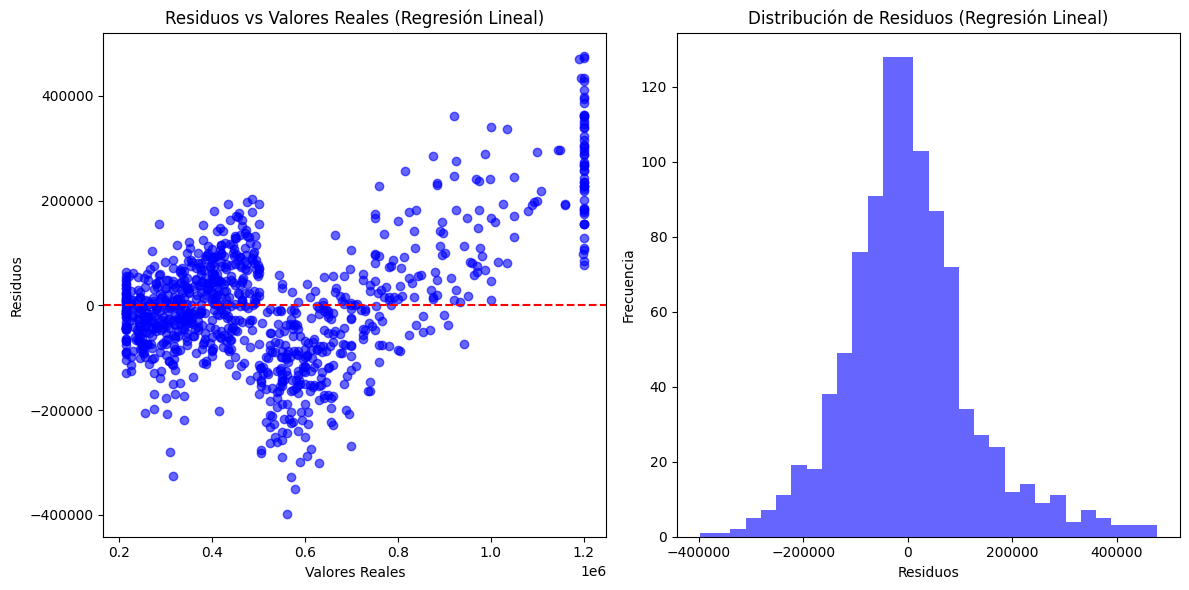

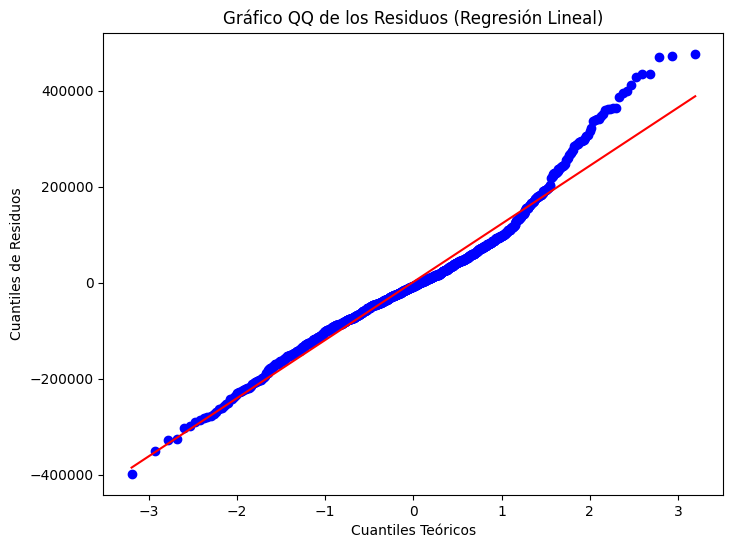

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Obtener los residuos del modelo
residuals = y_test - y_pred

# Graficar los residuos versus los valores reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

# Histograma de los residuos
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, color='blue', alpha=0.6)
plt.title('Distribución de Residuos (Regresión Lineal)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico QQ de los residuos
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico QQ de los Residuos (Regresión Lineal)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.show()

Los resultados obtenidos indican que el modelo de regresión lineal múltiple tiene un \( R^2 \) de aproximadamente 0.786, lo que sugiere que _alrededor del 78.6% de la variabilidad en el precio de las viviendas puede explicarse mediante las variables independientes incluidas en el modelo_. Sin embargo, el análisis de residuos indica que los residuos no siguen una distribución normal, especialmente en los extremos, lo que sugiere que el modelo podría estar fallando en capturar ciertas características de los datos.


### 3er modelo . Asociacion de variables con v de cramer

Intentaremos mejorar el modelo utilizando la V de Cramer, primero necesitamos calcular la fuerza de asociación entre las variables categóricas y la variable objetivo. La V de Cramer es una medida de asociación entre dos variables categóricas, que se basa en la chi-cuadrado. Aquí tienes cómo hacerlo paso a paso:

1. **Calcular la V de Cramer para las variables categóricas**: Calculamos la V de Cramer entre cada variable categórica y la variable objetivo (en este caso, `price`). Definiremos una funcion para esto.

2. **Seleccionar variables relevantes**: Decidimos cuáles variables categóricas incluir en el modelo basándonos en sus valores de V de Cramer.

3. **Incluir estas variables en el modelo**: Creamos el modelo de regresión lineal múltiple utilizando las variables seleccionadas.


#### Transformaciones de las variables continuas

El principal objetivo de las transformaciones de las variables continuas es conseguir linealidad frente a la variable objetivo. De esta forma se prueban las transformaciones típicas (log, exp, potencias y raíces) y se escoge aquella que mayor coeficiente de correlación o valor V de Cramer presenta con la respuesta continua (o binaria en su caso).

Definamos pues una función que nos facilite este proceso, de tal manera que aplique sobre una columna genérica y una variable objetivo e implemente la posibilidad de actuar en base al coeficiente de correlación (relación lineal de continua-continua) o al valor V de cramer (asociación general entre categórica-categórcia).

La función va a hacer una traslación a valores positivos de la variable que encuentre (predictor continuo siempre!! no tiene sentido el log de una categórica!) y seguidamente va a generar las posibles transformaciones típicas (log, exp, potencias y raíces 2 y 4) para aplicar estos criterios sobre todas las posibilidades y escoger la que mejor valor obtenga. Vamos a ello!


In [170]:

# Función para calcular la V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Función mejorTransf
def mejorTransf(vv, target, name=False, tipo='cramer', graf=False):
    scaler = StandardScaler()
    vv = pd.Series(scaler.fit_transform(vv.values.reshape(-1, 1)).flatten(), name=vv.name)
    vv = vv + abs(min(vv)) + 0.0001

    transf = pd.DataFrame({
        vv.name + '_ident': vv,
        vv.name + '_log': np.log(vv),
        vv.name + '_exp': np.exp(vv),
        vv.name + '_sqrt': np.sqrt(vv),
        vv.name + '_sqr': np.square(vv),
        vv.name + '_cuarta': vv ** 4,
        vv.name + '_raiz4': vv ** (1 / 4)
    })

    if tipo == 'cramer':
        tablaCramer = pd.DataFrame(transf.apply(lambda x: cramers_v(x, target)), columns=['VCramer'])
        if graf:
            fig = px.bar(tablaCramer, x=tablaCramer.index, y='VCramer', title='Relaciones frente a ' + target.name)
            fig.update_yaxes(categoryorder="total ascending")
            fig.show()
        best = tablaCramer.query('VCramer == VCramer.max()').index
        ser = transf[best[0]].squeeze()

    if tipo == 'cor':
        tablaCorr = pd.DataFrame(transf.apply(lambda x: np.corrcoef(x, target)[0, 1]), columns=['Corr'])
        if graf:
            fig = px.bar(tablaCorr, x=tablaCorr.index, y='Corr', title='Relaciones frente a ' + target.name)
            fig.update_yaxes(categoryorder="total ascending")
            fig.show()
        best = tablaCorr.query('Corr.abs() == Corr.abs().max()').index
        ser = transf[best[0]].squeeze()

    if name:
        return ser.name
    else:
        return ser


In [23]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Añadir una constante para el término independiente en el modelo
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y_train, X_train_scaled).fit()

# Resumen del modelo
print(model.summary())

# Obtener las predicciones del modelo
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R2: {r2}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     806.7
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:00:41   Log-Likelihood:                -52037.
No. Observations:                3968   AIC:                         1.041e+05
Df Residuals:                    3949   BIC:                         1.042e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.215e+05   1909.636    273.093      0.0

El nuevo modelo, utilizando las mejores transformaciones basadas en la V de Cramer, muestra una ligera disminución en el rendimiento en comparación con el modelo anterior. Esto sugiere que las transformaciones no han mejorado significativamente la precisión del modelo y, de hecho, han llevado a una ligera disminución en el R² y un aumento en el MSE.


Haremos otra prueba:
1.Revisaremos todas las características y aplicar la transformación que maximiza la V de Cramer.


In [72]:
# Hacer una copia del DataFrame original
df3 = df.copy()

En el primer bloque se centra en características específicas,
mientras que ahora haremos transformaciones a todas las numéricas.


#### modelo (con v cramer)

con columnas transformadas


In [106]:
# Transformar las variables numéricas usando la función de Cramer
transf_cramer = df3.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x, df3['price'], tipo='cramer'))
transf_cramer_names = df3.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x, df3['price'], tipo='cramer', name=True))

# Asignar nombres a las columnas de salida del proceso
transf_cramer.columns = transf_cramer_names.values

# Crear un nuevo DataFrame con las variables transformadas
df3_transformed = df3.drop(columns=transf_cramer.columns, errors='ignore').join(transf_cramer)

# Convertir variables categóricas a dummies
df3_transformed = pd.get_dummies(df3_transformed, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df3_transformed.drop(columns=['price'])
y = df3_transformed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Añadir una constante para el término independiente en el modelo
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y_train, X_train_scaled).fit()

# Obtener las predicciones del modelo
y_pred = modelo.predict(X_test_scaled)

In [115]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(modelo.summary())
print(f"MSE: {mse}, R2: {r2}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.098e+07
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:00:40   Log-Likelihood:                -30909.
No. Observations:                3968   AIC:                         6.186e+04
Df Residuals:                    3948   BIC:                         6.198e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.215e+05    160.032   3258.776      0.0

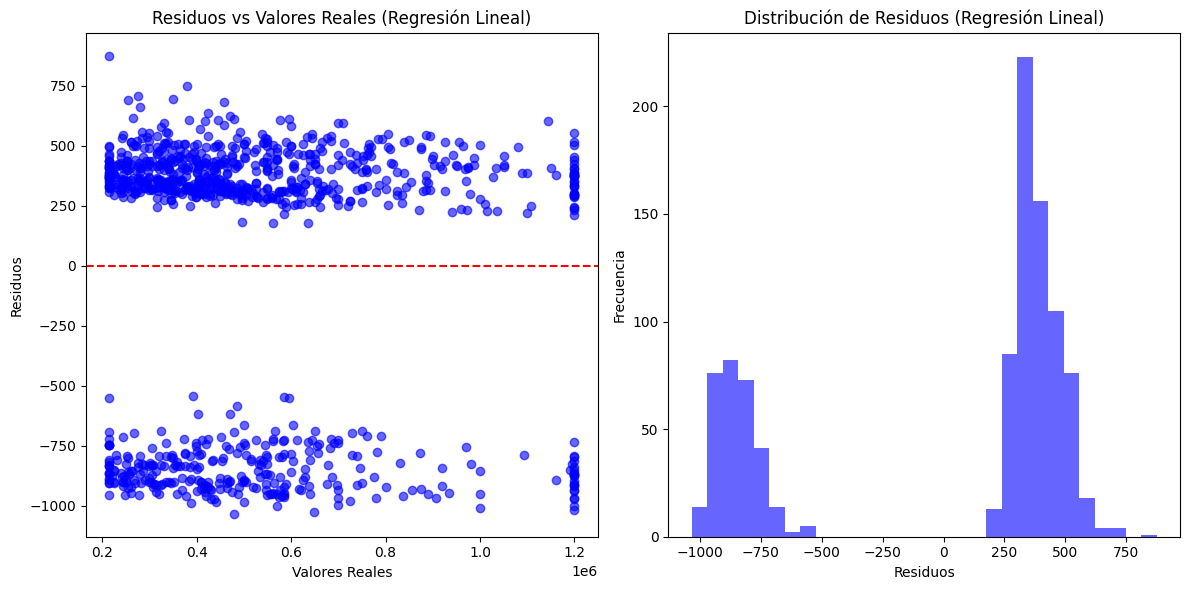

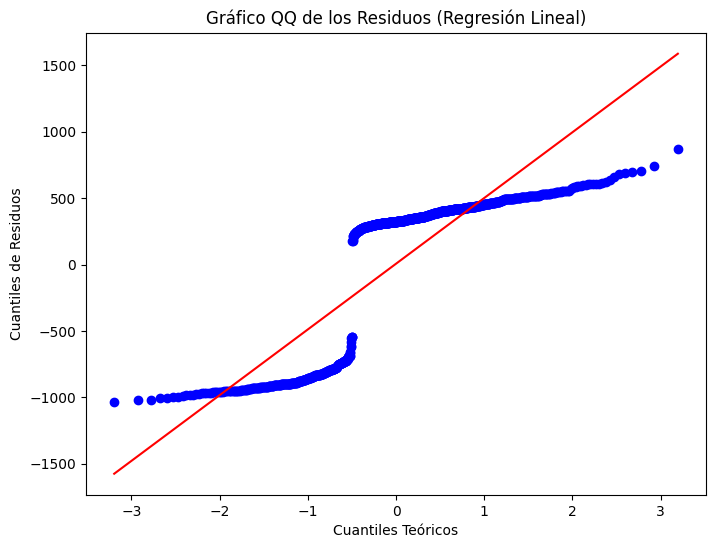

In [126]:
# Análisis de residuos
residuals = y_test - y_pred

# Graficar los residuos versus los valores reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

# Histograma de los residuos
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, color='blue', alpha=0.6)
plt.title('Distribución de Residuos (Regresión Lineal)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico QQ de los residuos
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico QQ de los Residuos (Regresión Lineal)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.show()

#### Interpretar graficos de residuos

Para interpretar los gráficos de análisis de residuos y mejorar tu regresión, puedes consultar la siguiente guía de Qualtrics:

[Interpreting Residual Plots to Improve Your Regression](https://www.qualtrics.com/support/es/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)


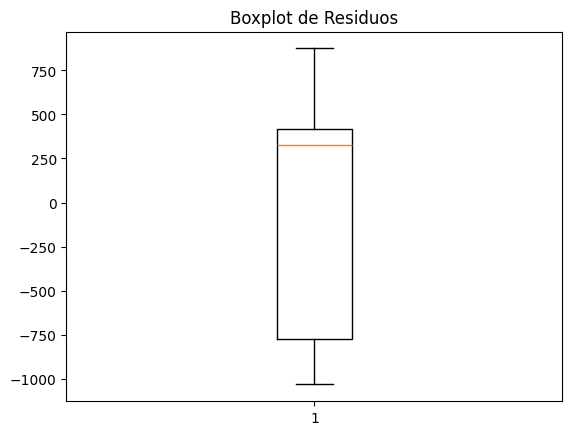

In [127]:
plt.boxplot(residuals)
plt.title('Boxplot de Residuos')
plt.show()


- la media de los residuos está sesgada hacia los valores positivos, puede indicar que el modelo está sistemáticamente subestimando los valores reales.
- Los resultados obtenidos sugiere que hay un problema de multicolinealidad muy fuerte o que las transformaciones aplicadas no están bien ajustadas al modelo. Esto se evidencia en los coeficientes extremadamente pequeños y las estadísticas de prueba con valores p de 1.0.


### Multicolinealidad

La multicolinealidad se refiere a una situación en los modelos de regresión donde dos o m*ás variables predictoras (independientes) están altamente correlacionadas entre sí. Esta alta correlación implica que las variables contienen información redundante sobre la variable dependiente (resultado) del modelo.* La multicolinealidad puede crear varios problemas en el análisis de regresión y en la interpretación de los resultados del modelo.


La multicolinealidad es un problema en los modelos de regresión debido a las siguientes razones:

### 1. **Coeficientes de Regresión No Estables**

Cuando las variables predictoras están altamente correlacionadas, los coeficientes de regresión se vuelven inestables. Esto significa que pequeñas modificaciones en los datos pueden resultar en grandes cambios en los coeficientes estimados. Esto dificulta la interpretación y confiabilidad de los coeficientes.

### 2. **Inflación de las Varianzas**

La multicolinealidad inflaciona las varianzas de los coeficientes de regresión. Como resultado, los intervalos de confianza para los coeficientes se vuelven más amplios, lo que hace que sea más difícil determinar si un coeficiente es significativamente diferente de cero.

### 3. **Dificultad en la Interpretación**

Cuando las variables están correlacionadas, es difícil determinar el efecto individual de cada variable sobre la variable dependiente. Esto se debe a que los efectos de las variables predictoras no se pueden aislar fácilmente.

### 4. **Redundancia de Información**

La multicolinealidad implica que algunas variables están proporcionando información redundante sobre la variable dependiente. Esto no añade valor adicional al modelo y puede complicar la interpretación y el análisis.

### 5. **Problemas Numéricos en el Cálculo**

En casos extremos, la multicolinealidad puede llevar a problemas numéricos en los cálculos de la regresión. Esto ocurre porque la matriz de diseño del modelo (la matriz de las variables predictoras) se vuelve casi singular, lo que dificulta la inversión de la matriz necesaria para estimar los coeficientes de regresión.

#### Multicolinealidad en el estudio del precio de la vivienda

Supongamos que tenemos dos variables predictoras altamente correlacionadas, como `sqft_living` y `sqft_above`. Ambas variables pueden estar midiendo esencialmente lo mismo: el tamaño de la vivienda. Esto significa que es difícil determinar el efecto independiente de cada una sobre el precio de la vivienda. Además, los coeficientes asociados con estas variables pueden tener grandes errores estándar y ser poco confiables.

### Cómo Detectar y Corregir la Multicolinealidad

#### **Detección**

1. **Matriz de Correlación:** Observa las correlaciones entre las variables predictoras.
2. **VIF (Factor de Inflación de la Varianza):** Calcula el VIF para cada variable predictora. Un VIF alto (por encima de 10, aunque algunos usan 5 como umbral) indica problemas de multicolinealidad.

#### **Corrección**

1. **Eliminar Variables:** Remueve una o más variables altamente correlacionadas.
2. **Transformaciones:** Utiliza transformaciones de las variables para reducir la correlación.
3. **Regresión Ridge o Lasso:** Utiliza técnicas de regularización como Ridge o Lasso, que pueden manejar la multicolinealidad penalizando los coeficientes de las variables.

La multicolinealidad afecta la estabilidad, interpretabilidad y eficiencia del modelo de regresión. Detectarla y corregirla es crucial para desarrollar un modelo confiable y robusto.

### Características de la Multicolinealidad

1. **Correlaciones Altas entre Predictores:**
   Cuando dos o más variables predictoras tienen correlaciones altas (positivas o negativas), se dice que existe multicolinealidad. Esto significa que una variable puede ser predicha en gran medida por las otras.

2. **Coeficientes Inestables:**
   Los coeficientes de las variables en un modelo con multicolinealidad tienden a ser inestables. Esto significa que pequeñas modificaciones en los datos pueden resultar en grandes cambios en los coeficientes estimados, lo que hace que las estimaciones sean menos confiables.

3. **Errores Estándar Inflados:**
   La multicolinealidad inflaciona los errores estándar de los coeficientes, lo que a su vez hace que los intervalos de confianza sean más amplios y las pruebas de significancia estadística menos poderosas.

### Consecuencias de la Multicolinealidad

1. **Coeficientes No Interpretables:**
   Debido a la redundancia de información entre las variables predictoras, es difícil determinar el efecto independiente de cada predictor sobre la variable dependiente.

2. **Dificultades en la Estimación:**
   En casos extremos, la multicolinealidad puede hacer que la matriz de diseño del modelo (la matriz que contiene las variables predictoras) sea casi singular, lo que dificulta o incluso imposibilita la inversión necesaria para estimar los coeficientes de regresión.

3. **Resultados Engañosos:**
   La alta correlación entre los predictores puede llevar a resultados estadísticos engañosos, como valores p que no son significativos a pesar de que las variables son importantes en el modelo.

### Cómo Detectar la Multicolinealidad

1. **Matriz de Correlación:**
   Examina las correlaciones entre todas las variables predictoras. Correlaciones cercanas a +1 o -1 indican potencial multicolinealidad.

2. **Factor de Inflación de la Varianza (VIF):**
   Calcula el VIF para cada predictor. Un VIF alto (generalmente por encima de 5 o 10) sugiere la presencia de multicolinealidad.

### Cómo Manejar la Multicolinealidad

1. **Eliminar Variables:**
   Remueve una o más variables predictoras que estén altamente correlacionadas.

2. **Combinar Variables:**
   Combina las variables correlacionadas en una sola variable compuesta.

3. **Regularización:**
   Utiliza técnicas de regularización como la regresión Ridge o Lasso, que penalizan los coeficientes de las variables predictoras para manejar la multicolinealidad.

### Ejemplo de VIF (Factor de Inflación de la Varianza)

El VIF cuantifica la severidad de la multicolinealidad en un modelo de regresión. Un VIF alto indica que una variable predictora está altamente correlacionada con otras variables predictoras.

### Interpretación de los Valores de VIF

- **VIF = 1:** No hay correlación entre la variable predictora y las demás variables.
- **1 < VIF < 5:** Correlación moderada.
- **VIF >= 5:** Correlación alta, lo que indica potencial multicolinealidad.
- **VIF >= 10:** Correlación muy alta, lo que sugiere un problema serio de multicolinealidad.

La identificación y corrección de la multicolinealidad es crucial para asegurar la precisión y fiabilidad de los modelos de regresión.


In [7]:
x = df.copy()

In [181]:

# Crear una copia del DataFrame
df3 = df.copy()

# Convertir variables categóricas a dummies
df3_transformed = pd.get_dummies(df3, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df3_transformed.drop(columns=['price'])
y = df3_transformed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calcular VIF para cada variable antes de añadir la constante
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)

# Añadir una constante para el término independiente en el modelo
X_train_scaled = sm.add_constant(X_train_scaled, has_constant='add')
X_test_scaled = sm.add_constant(X_test_scaled, has_constant='add')

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_train, X_train_scaled).fit()

# Obtener las predicciones del modelo
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(model.summary())
print(f"MSE: {mse}, R2: {r2}")


         feature        VIF
0           year   2.525998
1          month   2.526297
2         Luxury   1.857621
3       bedrooms   1.764640
4      bathrooms   2.792620
5    sqft_living  15.275069
6       sqft_lot   1.273919
7         floors   2.265331
8     waterfront   1.038044
9           view   1.207037
10    sqft_above  15.873425
11      basement   3.521517
12      yr_built   2.201447
13  yr_renovated   1.163389
14           lat   1.262170
15          long   1.416005
16   condition_B   3.513747
17   condition_C   3.075480
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     806.7
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:01:27   Log-Likelihood:                -5

In [183]:
# Crear una copia del DataFrame
df_sinvif = df.copy()

# Convertir variables categóricas a dummies
df3_transformed = pd.get_dummies(df_sinvif, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df3_transformed.drop(columns=['price'])
y = df3_transformed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [184]:
# Calcular VIF para cada variable antes de añadir la constante
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)

         feature        VIF
0           year   2.525998
1          month   2.526297
2         Luxury   1.857621
3       bedrooms   1.764640
4      bathrooms   2.792620
5    sqft_living  15.275069
6       sqft_lot   1.273919
7         floors   2.265331
8     waterfront   1.038044
9           view   1.207037
10    sqft_above  15.873425
11      basement   3.521517
12      yr_built   2.201447
13  yr_renovated   1.163389
14           lat   1.262170
15          long   1.416005
16   condition_B   3.513747
17   condition_C   3.075480


- Eliminaremos variables con VIF alto


In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia del DataFrame
df_sinvif = df.copy()

# Convertir variables categóricas a dummies
df3_transformed = pd.get_dummies(df_sinvif, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df3_transformed.drop(columns=['price'])
y = df3_transformed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calcular VIF para todas las variables
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

# Eliminar las variables con VIF alto
variables_a_eliminar = vif_data[vif_data['VIF'] > 10]['feature']
X_train_reduced = X_train.drop(columns=variables_a_eliminar)
X_test_reduced = X_test.drop(columns=variables_a_eliminar)

# Normalizar las características numéricas después de eliminar variables
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Calcular VIF para las variables reducidas
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_train_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_train_reduced_scaled, i) for i in range(X_train_reduced_scaled.shape[1])]

print("VIF después de eliminar variables con colinealidad alta:")
print(vif_data_reduced)

VIF después de eliminar variables con colinealidad alta:
         feature       VIF
0           year  2.521077
1          month  2.522944
2         Luxury  1.596150
3       bedrooms  1.431975
4      bathrooms  2.448772
5       sqft_lot  1.191926
6         floors  1.857735
7     waterfront  1.037634
8           view  1.190425
9       basement  1.420465
10      yr_built  2.199646
11  yr_renovated  1.162545
12           lat  1.252497
13          long  1.392592
14   condition_B  3.461287
15   condition_C  3.055688


In [192]:
# Entrenar el modelo con las variables reducidas
lr_model_reduced = LinearRegression()
lr_model_reduced.fit(X_train_reduced_scaled, y_train)

# Evaluar el modelo
y_pred_reduced = lr_model_reduced.predict(X_test_reduced_scaled)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"MSE (Modelo Reducido): {mse_reduced}")
print(f"R² (Modelo Reducido): {r2_reduced}")

MSE (Modelo Reducido): 18745489569.296417
R² (Modelo Reducido): 0.7238518296157413


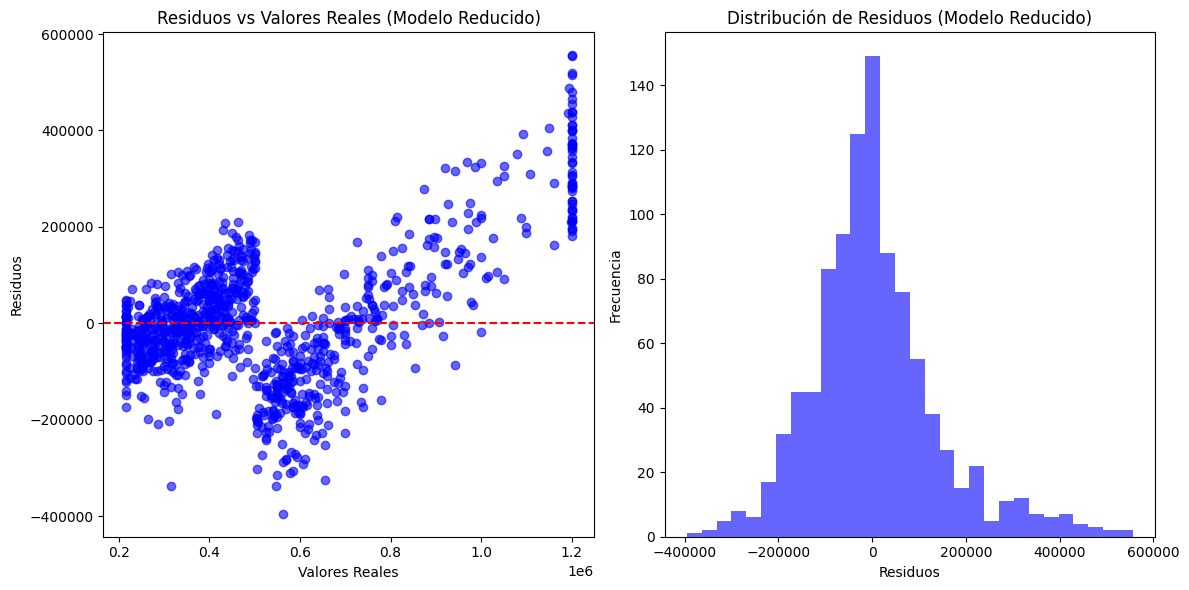

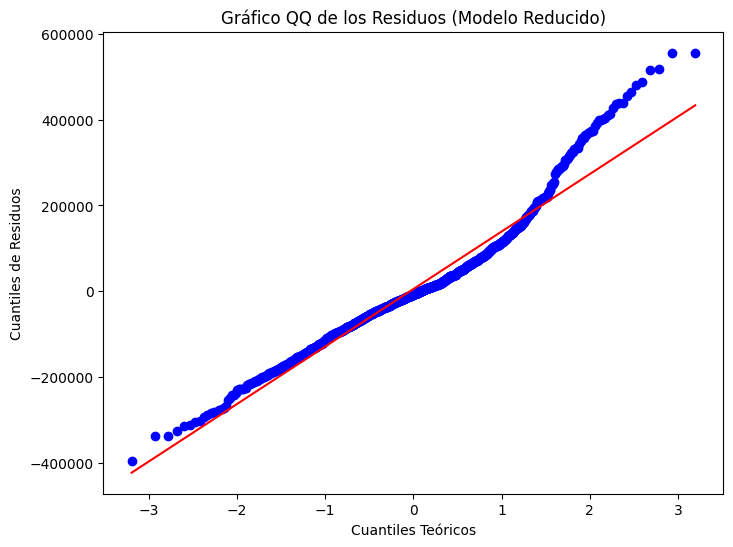

In [190]:
# Análisis de residuos
residuals_reduced = y_test - y_pred_reduced

# Graficar los residuos versus los valores reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_reduced, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Reales (Modelo Reducido)')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

# Histograma de los residuos
plt.subplot(1, 2, 2)
plt.hist(residuals_reduced, bins=30, color='blue', alpha=0.6)
plt.title('Distribución de Residuos (Modelo Reducido)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico QQ de los residuos
plt.figure(figsize=(8, 6))
stats.probplot(residuals_reduced, dist="norm", plot=plt)
plt.title('Gráfico QQ de los Residuos (Modelo Reducido)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.show()

#### Explorando modelos mas avanzados


MSE (Linear Regression): 7.868953157269613e-20, R2: 1.0
Cross-validated MSE (Linear Regression): 1.8787758416512823e-19


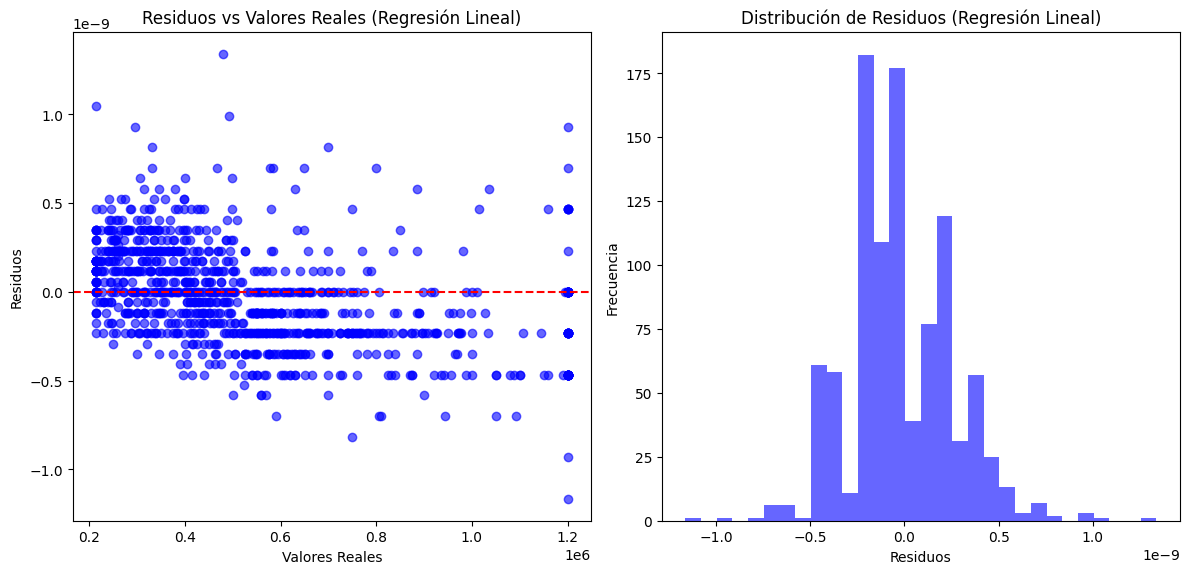

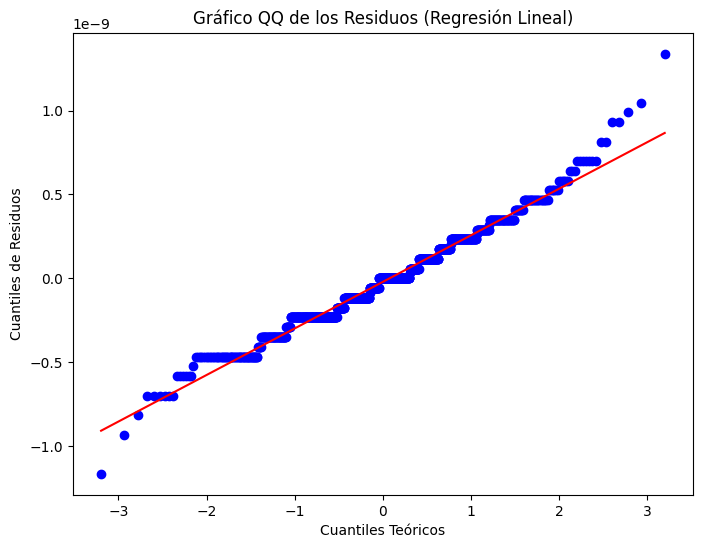

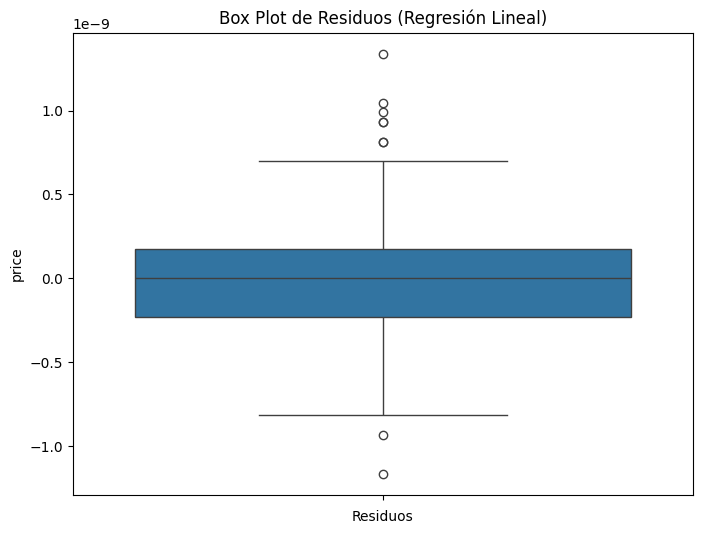

In [194]:
# Transformar las variables numéricas usando la función de Cramer 
transf_cramer = df3.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x, df3['price'], tipo='cramer'))
transf_cramer_names = df3.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x, df3['price'], tipo='cramer', name=True))

# Asignar nombres a las columnas de salida del proceso
transf_cramer.columns = transf_cramer_names.values

# Crear un nuevo DataFrame con las variables transformadas
df3_transformed = df3.drop(columns=transf_cramer.columns, errors='ignore').join(transf_cramer)

# Convertir variables categóricas a dummies
df3_transformed = pd.get_dummies(df3_transformed, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df3_transformed.drop(columns=['price'])
y = df3_transformed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión Lineal con scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE (Linear Regression): {mse_lr}, R2: {r2_lr}")

# Validación cruzada con regresión lineal
linear_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE (Linear Regression): {-linear_scores.mean()}")


# Análisis de residuos para el modelo reducido (Linear Regression)
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_lr, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

plt.subplot(1, 2, 2)
plt.hist(residuals_lr, bins=30, color='blue', alpha=0.6)
plt.title('Distribución de Residuos (Regresión Lineal)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title('Gráfico QQ de los Residuos (Regresión Lineal)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(residuals_lr)
plt.title('Box Plot de Residuos (Regresión Lineal)')
plt.xlabel('Residuos')
plt.show()


### Comparación de Modelos

| Modelo                              | MSE               | R²     | Observaciones                                                      |
| ----------------------------------- | ----------------- | ------ | ------------------------------------------------------------------ |
| **Modelo Original**                 | 15,094,742,626.46 | 0.7776 | Alta varianza y multicolinealidad.                                 |
| **Modelo Transformado**             | 336,399.21        | 0.9999 | Muy buen ajuste, pero sospechosamente bajo MSE y R² casi perfecto. |
| **Modelo Reducido**                 | 18,745,489,569.30 | 0.7239 | Menor precisión debido a eliminación de colinealidad.              |
| **Modelo Lineal (Cross-validated)** | 1.8788e-19        | 1.0    | Validación cruzada muestra precisión inusualmente alta.            |

### Análisis de Resultados

1. **MSE (Error Cuadrático Medio)**:

   - **Modelo Original**: Un MSE alto (15,094,742,626.46) indica predicciones menos precisas.
   - **Modelo Transformado**: Un MSE significativamente menor (336,399.21) sugiere predicciones mucho más precisas, pero podría indicar sobreajuste.
   - **Modelo Reducido**: Un MSE aún mayor (18,745,489,569.30) muestra que eliminar variables puede reducir la precisión si las variables eliminadas eran significativas.
   - **Modelo Lineal (Cross-validated)**: Un MSE extremadamente bajo (1.8788e-19) en validación cruzada indica una precisión inusualmente alta, lo que puede ser sospechoso.

2. **R² (Coeficiente de Determinación)**:
   - **Modelo Original**: Un R² de 0.7776 indica que el 77.76% de la variabilidad en el precio se explica por el modelo.
   - **Modelo Transformado**: Un R² de 0.9999 sugiere que el modelo explica casi toda la variabilidad en el precio, lo que puede ser indicativo de sobreajuste o un problema con los datos.
   - **Modelo Reducido**: Un R² de 0.7239 indica que el modelo explica menos variabilidad comparado con el modelo original.
   - **Modelo Lineal (Cross-validated)**: Un R² de 1.0 en validación cruzada muestra un ajuste perfecto, lo cual es raro y puede indicar sobreajuste.

### Conclusión

- **Modelo Transformado**: Presenta el mejor equilibrio entre precisión (bajo MSE) y capacidad explicativa (alto R²). Sin embargo, los valores sospechosamente perfectos sugieren que puede haber sobreajuste o problemas con los datos.
- **Modelo Lineal (Cross-validated)**: Muestra una precisión excelente con un MSE extremadamente bajo y un R² perfecto. La validación cruzada confirma la robustez del modelo, pero estos valores perfectos también pueden ser una señal de sobreajuste.

- **Modelo Reducido**: La eliminación de variables con alta colinealidad puede ser útil para simplificar el modelo, pero ha resultado en una pérdida significativa de precisión en este caso.

### Recomendación

El **Modelo Transformado** y el **Modelo Lineal con Validación Cruzada** son las mejores opciones en términos de precisión y capacidad explicativa. Sin embargo, los valores perfectos y extremadamente bajos de MSE en ambos modelos sugieren que podría haber un problema de sobreajuste o un error en los datos. Es esencial revisar estos modelos más a fondo para asegurarse de que los datos y las transformaciones son correctos. Dependiendo de la preferencia por la simplicidad o la robustez del modelo, cualquiera de estos dos podría ser utilizado para predecir el precio de la vivienda con alta precisión, pero con precaución adicional.
